In [1]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [2]:
# Data processing functions
def rename_file(path, label):
    i = 0
    for filename in os.listdir(path):
        try:
            extension = os.path.splitext(filename)[1]
            src = os.path.join(path, filename)
            dst = os.path.join(path, label + str(i) + extension)
            os.rename(src, dst)
            i+=1
        except Exception as e:
            print(e)
            i+=1 
            continue
    print("Rename completed")
    
def resize_img(src,dst):
    for filename in os.listdir(src):
        try:
            img = Image.open(os.path.join(src, filename))
            new_img = img.resize((128,128))
            
            if not os.path.exists(dst):
                os.makedirs(dst)
                
            new_img.save(os.path.join(dst, filename))
        except Exception as e:
            print(e)
            continue
    print("Resize completed")

def load_image(path):
    img = Image.open(path)
    img_standardize = np.asarray(img.resize((128,128)))/255
    new_img = img_standardize.reshape(1,-1)
    plt.imshow(img)
    return new_img

In [3]:
def get_train_set(path,search):
    all_img = []
    label = []
    
    for filename in os.listdir(path):
        try:
            if re.search(search,filename):
                label.append(1)
            else: 
                label.append(0)
            
            img = Image.open(os.path.join(path, filename))
            img_arr = np.array(img)
            all_img.append(img_arr)
        except Exception as e:
            print(e)
            continue
        
    all_img_arr = np.array(all_img).reshape(len(all_img),-1)
    all_img_arr = all_img_arr.reshape(all_img_arr.shape[0],-1)
    label_arr = np.array(label).reshape(-1,1)
    all_img_arr_unique, idx = np.unique(all_img_arr,axis=0, return_index=True)
    label_arr_unique = label_arr[idx]
        
    return all_img_arr_unique/255, label_arr_unique

In [4]:
# Logistic regression functions
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def initialize(dim):
    w = np.zeros((dim,1))
    b = 0
    return w, b

def cost_function(x,y,w,b):
    hx = sigmoid(np.dot(x,w)+b)
    return (-1/y.shape[0]) * np.sum(y*np.log(hx) + (1-y)*np.log(1-hx))

def predict(x,w,b):
    y_pred = sigmoid(np.dot(x,w) + b)
    return (y_pred >= 0.5).astype(int)

In [5]:
def model(x_train, y_train, x_test, y_test, learning_rate, iter_num):
    w, b = initialize(x_train.shape[1])
    iter_list = []
    costs_list = []
    
    for i in range(iter_num+1):
        m = x_train.shape[0]
        hx = sigmoid(np.dot(x_train,w) + b) # (sample,1)
        costs_list.append(cost_function(x_train,y_train,w,b))
        iter_list.append(i)
        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost_function(x_train,y_train,w,b)}")
        dw = (1/m)*np.dot(x_train.T,(hx-y_train)) #(s,f)*(s,1) = (f,1)
        db = (1/m)*np.sum(hx-y_train)
        w = w - learning_rate*dw
        b = b - learning_rate*db
    
    print(f"\naccuracy for train set: {accuracy_score(y_train, predict(x_train,w,b))}")
    print(f"precision for train set: {precision_score(y_train, predict(x_train,w,b))}")
    print(f"\naccuracy for test set: {accuracy_score(y_test, predict(x_test,w,b))}")
    print(f"precision for test set: {precision_score(y_test, predict(x_test,w,b))}")
    plt.plot(iter_list,costs_list)
    plt.xlabel("Iteration")
    plt.ylabel("Cost")
    plt.title("Cost function")
    plt.show()
        
    return w, b

Iteration 0: Cost = 0.6931471805599453
Iteration 100: Cost = 0.5967758209080325
Iteration 200: Cost = 0.55689290900438
Iteration 300: Cost = 0.5290797028911709
Iteration 400: Cost = 0.5067684811917263
Iteration 500: Cost = 0.4877624230413359
Iteration 600: Cost = 0.4710466302373209
Iteration 700: Cost = 0.4560502839838808
Iteration 800: Cost = 0.4424103071074645
Iteration 900: Cost = 0.42987701400922446
Iteration 1000: Cost = 0.418269473115956

accuracy for train set: 0.8788927335640139
precision for train set: 0.8819444444444444

accuracy for test set: 0.6027397260273972
precision for test set: 0.6060606060606061


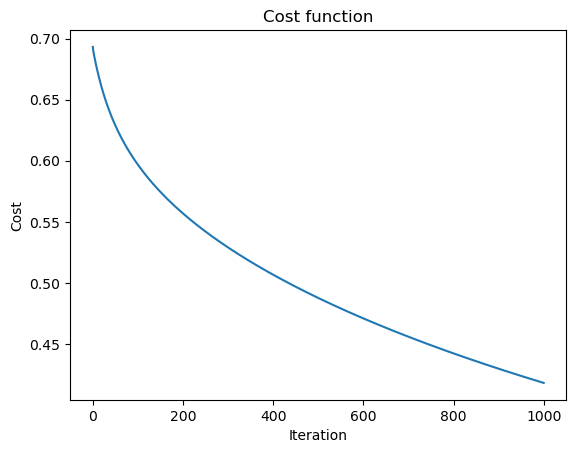

In [6]:
# Testing model
data_path_1 = "plastic bottle"
data_path_2 = "others"
label_1 = "plasticBottle"
label_2 = "others"
destination = "training set"
# rename_file(data_path_1, label_1)
# resize_img(data_path_1, destination)
# rename_file(data_path_2, label_2)
# resize_img(data_path_2, destination)

X_data, Y_data = get_train_set(destination,label_1)

x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=11)
# learning_rates = [0.01, 0.001, 0.0001, 0.00001]
iter_num = 1000
w, b = model(x_train, y_train,x_test,y_test, 0.0004, iter_num)